# Bag-of-Words Image Classification & Bayesian Estimation for Decision-Making

## Project Overview
This project explores **image classification** using the **Bag-of-Words (BoW) model** and applies **Bayesian estimation techniques** for decision-making in industrial diagnostics. It consists of two main parts:

- **Image Classification with Bag-of-Words:** Developing a **machine learning pipeline** to classify images of cats and dogs based on feature extraction, clustering, and classification using **K-Nearest Neighbors (KNN)**.
- **Bayesian Estimation for Decision Making:** Using **Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation** to classify machine parts as **healthy or damaged** based on age distributions.

---

## Part 1: Image Classification Using Bag-of-Words

### Overview
The **Bag-of-Words (BoW) model** is widely used in **object recognition and scene classification**. The objective is to classify images into **cat** and **dog** categories by converting images into numerical feature representations.

### Pipeline
1. **Feature Extraction:** Extracting key visual features using:
   - **SIFT (Scale-Invariant Feature Transform):** Captures distinctive local features.
   - **Image Patch Features:** Extracts raw pixel patterns from image patches.

   Interest points for feature extraction are identified using:
   - **Uniform Grid Sampling:** Divides images into regular grids.
   - **Harris Corner Detection:** Identifies corner-like features.

2. **Building the Visual Vocabulary (Clustering):**
   - Features from training images are clustered using **K-Means clustering** to form a **visual vocabulary**.
   - This step reduces redundancy and converts images into structured feature representations.

3. **Histogram Representation (Feature Encoding):**
   - Each image is represented as a histogram where each bin corresponds to a visual word.
   - This transforms images into numerical feature vectors.

4. **Image Classification Using K-Nearest Neighbors (KNN):**
   - A **KNN classifier** is trained with different values of **K (K=3, K=5)**.
   - The classifier assigns a new test image to the most similar category based on histogram comparisons.

### Results
The classification accuracy is evaluated using different configurations:
- **Feature types:** SIFT vs. Image Patch Features
- **Interest point selection:** Uniform Sampling vs. Corner Detection
- **Number of nearest neighbors:** K=3 vs. K=5

The model successfully differentiates between cats and dogs, demonstrating the effectiveness of BoW for **image classification**.

---

## Part 2: Bayesian Estimation for Industrial Decision-Making

### Overview
Bayesian probability techniques are applied to classify **machine parts** as **healthy or damaged** based on their age. The model leverages **prior probabilities** and **likelihood estimates** to make optimal classification decisions.

### Steps

1. **Data Analysis & Visualization:**
   - The dataset consists of **400 healthy parts** and **200 damaged parts**, distributed across different age groups.
   - **Histograms** are plotted for **$P(\text{age} | \text{healthy})$** and **$P(\text{age} | \text{damaged})$** to analyze the relationship between age and condition.

2. **Maximum Likelihood Estimation (MLE):**
   - MLE classifies new parts based purely on likelihoods **$P(\text{age} | \text{class})$**.
   - The decision rule is:

     $$
     P(\text{age} | \text{healthy}) > P(\text{age} | \text{damaged}) \Rightarrow \text{classify as healthy}
     $$

     otherwise, classify as **damaged**.

3. **Maximum A Posteriori (MAP) Estimation:**
   - Instead of assuming equal class probabilities, a prior is introduced:

     $$
     P(\text{healthy}) = 0.75, \quad P(\text{damaged}) = 0.25
     $$

   - MAP estimation applies **Bayes’ Rule**:

     $$
     P(\text{healthy} | \text{age}) = \frac{P(\text{age} | \text{healthy}) P(\text{healthy})}{P(\text{age})}
     $$

   - This accounts for class imbalance and results in **more robust classification decisions**.

4. **Visualization of Posterior Distributions:**
   - Posterior probabilities **$P(\text{healthy} | \text{age})$** and **$P(\text{damaged} | \text{age})$** are plotted to observe decision boundaries.
   - Parts are classified as **healthy or damaged** based on the **maximum posterior probability**.

---

## Key Takeaways
- **Bag-of-Words is effective for image classification**, even with simple feature extraction.
- **Feature representation significantly impacts performance** – SIFT generally outperforms raw image patches.
- **K-Means clustering structures visual information**, reducing dimensionality and improving classification.
- **Bayesian estimation is useful for industrial diagnostics**, enabling probabilistic decision-making based on observed data.

## Potential Improvements
- Implement **deep learning-based feature extraction (CNNs)** for improved classification.
- Use **Support Vector Machines (SVMs)** instead of KNN for better decision boundaries.
- Explore **Bayesian networks** for multi-factor industrial diagnostics.

## Technologies Used
- **Python, OpenCV, NumPy, Matplotlib**
- **Scikit-learn (K-Means, KNN)**
- **Bayesian Statistics & Probabilistic Modeling**


## 1: Image Classiﬁcation Using Bag-of-words


This builds a build a classifier to determine whether an input image contains a cat or a dog. We will create a bag-of-words representation for images and use K-nearest neighbor classification. 

## Simple image classifier
We will make a classifier to tell whether a given image is a cat or a dog. The dataset contains 400 images of cats and 400 images of dogs. We will pick 300 images from each group for training and the other 100 images for testing. The skeleton code is given.

In [2]:
import glob
import random
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Parameters
posData = 'animals/cats/'
negData = 'animals/dogs/'
TrainRatio = 0.75
imSize = 133, 200 # resize each image to this size
nIntPts = 200 # maximum number of interest points to be extracted from an image
wGrid = 5 # width of the small grids for uniform sampling
patchSize = 11 # an odd number indicate patch size for image patch feature
nCluster = 50 # number of cluster in k-means algorithm
random.seed(1234)

def listImage(dataRoot):
    fileList = glob.glob(str(dataRoot + '*.jpg'))
    imNum = len(fileList)
    fileList = [fileList[i].replace('\\', '/') for i in range(imNum)]
    return fileList

def loadImage(imgName, imSize):
    # load image, resize and make RGB to grayscale
    img = cv2.imread(imgName)
    img = cv2.resize(img, (imSize[1], imSize[0]))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def createSplit(imgList, ratio):
    random.shuffle(imgList)
    trainList = imgList[:round(len(imgList)*ratio)]
    testList = imgList[round(len(imgList)*ratio):]
    return trainList, testList

# Data preprocessing: Create Training / Testing Split
posList = listImage(posData)
negList = listImage(negData)
trainPosList, testPosList = createSplit(posList, TrainRatio)
trainNegList, testNegList = createSplit(negList, TrainRatio)
trainList = trainPosList + trainNegList
trainLabel = np.concatenate((np.ones(len(trainPosList)), np.zeros(len(trainNegList))))
testList = testPosList + testNegList
testLabel = np.concatenate((np.ones(len(testPosList)), np.zeros(len(testNegList))))
testPosLabel = np.ones(len(testPosList))
testNegLabel = np.zeros(len(testNegList))

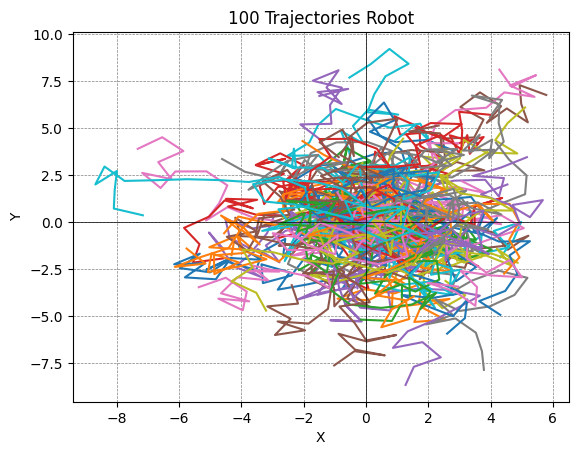

19.774144300200177


In [37]:
import numpy as np
import matplotlib.pyplot as plt

n_steps = 20  
n_trajectories = 100

trajectories = np.zeros((n_trajectories, 2))
distances = np.zeros((n_trajectories))

# Simulate each trajectory
for i in range(n_trajectories):
    angles = np.random.uniform(0, 2 * np.pi, n_steps)  # generate a random angle
    steps = np.vstack((np.cos(angles), np.sin(angles))).T  # create all the steps
    trajectory = np.cumsum(steps, axis=0) # create trajectory
    final_position = trajectory[-1]  # get final position of trajectory
    distance = final_position[0]**2 + final_position[1]**2 # calculate distance
    distances[i] = distance
    plt.plot(trajectory[:, 0], trajectory[:, 1])  # plot trajectory

# Plot formatting
plt.xlabel('X')
plt.ylabel('Y')
plt.title('100 Trajectories Robot')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()


# Calculate the sample mean of the squared distances
sample_mean_squared_distance = np.mean(distances)
print(sample_mean_squared_distance)


Extract interest points from images

Trying two methods for this: 

* **(a) Uniformly sample the images.** divide the image into regular grids and choose a point in each grid and then uniformly choose `nPts` number of interest points. 
* **(b) Sample on corners.**  use the Harris Corner detector to detect corners in the image and then uniformly choose `nPts` number of interest points. 

Interest Points extracted by uniform (above) and edge (below) method:


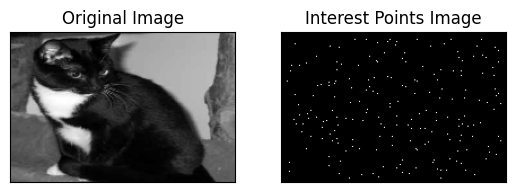

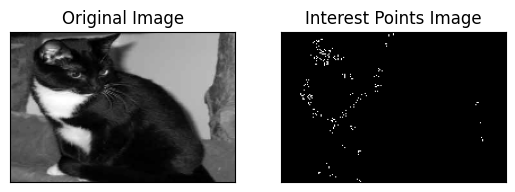

In [46]:
def uniformSampling(imSize, nPts, wGrid):
    ''' Uniformly sample the images.
    Args: 
        imSize: size of images (height, width)
        nPts: maximum number of interest points to be extracted
        wGrid: width of the small grids
    Return:
        pts: a list of interest points (Yi, Xi)
    '''
    pts = []

    height = imSize[0]
    width = imSize[1]

    point_list = []
    

    # Divide image into regular grids and choose a point in each grid
    for i in range(wGrid, height-wGrid, wGrid):
     for j in range(wGrid, width-wGrid, wGrid):
         i_offset = random.randint(0, wGrid-1)
         j_offset = random.randint(0, wGrid-1)
         random_point = (i + i_offset,j + j_offset)
    
         point_list.append(random_point)
         
    # Uniformly choose nPts from the points list
    pts = random.sample(point_list, nPts)

    return pts

def cornerSampling(img, nPts):
    '''
    Args: 
        img: image which you want to extract interest points
        nPts: maximum number of interest points to be extracted
    Return:
        pts: a list of interest points (Yi, Xi)
    '''
    dst = cv2.cornerHarris(img,2,3,0.04)
    dst = cv2.dilate(dst,None)
    cor = np.zeros(img.shape)
    cor[dst>0.01*dst.max()]=[1]
    ptsY, ptsX = np.where(cor==1)
    num = min(nPts, len(ptsY))
    choice = np.random.choice(len(ptsY), num, replace=False)
    ptsY = ptsY[choice]
    ptsX = ptsX[choice]
    pts = [(ptsY[i], ptsX[i]) for i in range(num)]
    return pts

def plotInterestPoints(img, pts, idx=0):
    ptsMap = np.zeros(img.shape)
    ptsY = [Y for Y, X in pts]
    ptsX = [X for Y, X in pts]
    ptsMap[ptsY, ptsX] = 1
    plt.figure(idx)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(ptsMap,cmap = 'gray')
    plt.title('Interest Points Image'), plt.xticks([]), plt.yticks([])

# Here is the code for you to test your implementation
sampleImg = loadImage(trainList[0], imSize)
print('Interest Points extracted by uniform (above) and edge (below) method:')
ptsU = uniformSampling(imSize, nIntPts, wGrid)
plotInterestPoints(sampleImg, ptsU, idx=0)
ptsE = cornerSampling(sampleImg, nIntPts)
plotInterestPoints(sampleImg, ptsE, idx=1)

In [227]:
def extractSIFTfeature(img, pts):
    '''
    Args:
        img: input image
        pts: detected interest points in the previous step
    Return:
        features: a list of SIFT descriptor features for each interest point
    '''
    sift = cv2.SIFT_create()
    kp = [cv2.KeyPoint(float(ptsX), float(ptsY), 1) for ptsY, ptsX in pts]
    _, des = sift.compute(img, kp)
    features = [des[i] for i in range(des.shape[0])]
    return features

def extractImagePatchfeature(img, pts, patchSize):
    '''
    Args:
        img: input image
        pts: detected interest points in the previous step
        patchSize: an odd number indicate patch size
    Return:
        features: a list of image patch features (1-d) for each interest point
    '''
    features = []

    w_width = patchSize // 2
    valid_pts = [pt for pt in pts if pt[0] > w_width and pt[0] < img.shape[0] - w_width and pt[1] > w_width and pt[1] < img.shape[1] - w_width]

    for center_point in valid_pts:
        i, j = center_point
        # get patch around point in image
        patch = img[i-w_width:i+w_width+1, j-w_width:j+w_width+1]
        patch = patch.flatten()
        print(patch.shape)
        features.append(patch)
        
        
    # Take patch and vectorize it and it gives us direction of point in 121 dimension space
    
    return features
    
# Here is the code for you to test your implementation
featSIFT = extractSIFTfeature(sampleImg, ptsE)
print('length of SIFT feature list', len(featSIFT))
print('dimension of feature', featSIFT[0].shape) 
featPatch = extractImagePatchfeature(sampleImg, ptsE, patchSize) 
print('length of Image Patch feature list', len(featPatch)) 
print('dimension of feature', featPatch[0].shape) 
# print("patchSize", patchSize)

length of SIFT feature list 200
dimension of feature (128,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(121,)
(1

## Build visual vocabulary 
Use k-means clustering to form a visual vocabulary. The default number of cluster centers in k-means is 50. 

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [199]:
from sklearn.cluster import KMeans

def getImgFeat(img, imSize, nIntPts, wGrid, patchSize, ptType, featType):
    ''' Output a list of detected features for an image
    Args: 
        img: image which you want to extract interest points
        imSize: size of images (height, width)
        nIntPts: maximum number of interest points to be extracted
        wGrid: width of the small grids
        patchSize: an odd number indicate patch size
        ptType: 'uniform' or 'corner' indicates the interest pts sampling method
        featType: 'sift' or 'patch' indicates the feature extraction method
    Return:
        extractFeatList: a list of image patch features (1-d) for each interest point
    '''
    if ptType == 'uniform':
        intPts = uniformSampling(imSize, nIntPts, wGrid)
    elif ptType == 'corner':
        intPts = cornerSampling(img, nIntPts)
    else:
        assert False, 'ptType must be either uniform or corner'
        
    if featType == 'sift':
        extractFeatList = extractSIFTfeature(img, intPts)
    elif featType == 'patch':
        extractFeatList = extractImagePatchfeature(img, intPts, patchSize)
    else:
        assert False, 'featType must be either sift or patch'
        
    return extractFeatList

def collectFeat(trainList, imSize, nIntPts, wGrid, patchSize, ptType, featType):
    ''' Collect extracted features for each image among training data
    Args:
        trainList: list of images filepath
        imSize: size of images (height, width)
        nIntPts: maximum number of interest points to be extracted
        wGrid: width of the small grids
        patchSize: an odd number indicating the patch size
        ptType: 'uniform' or 'corner' indicates the sampling method used to pick points
        featType: 'sift' or 'patch' indicates the feature extraction method
    Return:
        feats: (# of features, dim of feature) array

    '''
    feats = []

    for imgPath in trainList:
        img = loadImage(imgPath, imSize)
        imgFeat = getImgFeat(img, imSize, nIntPts, wGrid, patchSize, ptType, featType)
        # print("feature length",len(imgFeat[0]))
        feats.append(imgFeat) # appends a list of features for this img of length nIntPts
    # print("num of features", len(feats))
    # print(len(feats[0]), nIntPts)
    
    return np.concatenate(feats, axis=0)


def formVisualVocab(feats, nCluster):
    ''' Use k-means algorithm to find k cluster centers, output k-means model
    Args: 
        feats: list of features collected from training data
        nCluster: number of cluster in k-means algorithm
    Return:
        model: k-means model for following steps
    '''
    model = None
    
    #-------------------------------------#
    #         WRITE YOUR CODE HERE        #
    #-------------------------------------#
    # - first compare each feature vector with the K - cluster centers 
    # and assign it the cluster closest to it
    kmeans = KMeans(n_clusters=nCluster)
    model = kmeans.fit(feats)
    
    # - next you will update the cluster center by averaging all the points that were assigned to it
    # - repeat this process till you see no change in the K centers
    return model

# Here is the code for you to test your implementation
feats = collectFeat(trainList, imSize, nIntPts, wGrid, patchSize, ptType='uniform', featType='sift')
print(feats.shape) # should be (total number of extracted features, dim of feature)
model = formVisualVocab(feats, nCluster)
centers = model.cluster_centers_
print(centers.shape) # should be (nCluster, dim of feature)

(120000, 128)
(50, 128)


## Compute histogram representation
Compute the histogram representation of each image, with bins defined over the visual words in the vocabulary. These histograms are the bag-of-words representations of images that will be used for image classiﬁcation. 


In [139]:
def getHistogram(img, model, nCluster, imSize, nIntPts, wGrid, patchSize, ptType, featType):
    '''
    Calculate histogram representation for single image
    Args:
        img: input image
        model: k-means model from previous step
        nCluster: number of cluster in k-means algorithm
        imSize: size of images (height, width)
        nIntPts: maximum number of interest points to be extracted
        wGrid: width of the small grids
        patchSize: an odd number indicate patch size
        ptType: 'uniform' or 'corner' indicates the interest pts sampling method
        featType: 'sift' or 'patch' indicates the feature extraction method
    Return:
        hist: array of shape (nCluster). Histogram representation (1-d) for input image.
    '''
    hist = np.zeros(nCluster)
    imgFeatList = getImgFeat(img, imSize, nIntPts, wGrid, patchSize, ptType, featType)
    # for feature in imgFeatList:
    # for each vectorized patch / image feature in the list, find closest kcenter
    imgFeatList = np.array(imgFeatList)
    # returns index of closest kcenter for all features
    closest_cluster_index = model.predict(imgFeatList) 
    for index in closest_cluster_index:
        hist[index] += 1

    return hist
    
def computeHistograms(trainList, model, nCluster, imSize, nIntPts, wGrid, patchSize, ptType, featType):
    ''' Compute histogram representation for whole training dataset
    Args: 
        trainList: list of images filepath
        model: k-means model from formVisualVocab
        nCluster: number of cluster in k-means algorithm
        imSize: size of images (height, width)
        nIntPts: maximum number of interest points to be extracted
        wGrid: width of the small grids
        patchSize: an odd number indicate patch size
        ptType: 'uniform' or 'corner' indicates the interest pts sampling method
        featType: 'sift' or 'patch' indicates the feature extraction method
    Return:
        hists: (# of images, nCluster) array - histogram representations among training dataset
    '''
    hists = np.zeros((len(trainList), nCluster))
    for image_num, imgPath in enumerate(trainList):
        img = loadImage(imgPath, imSize)
        hist = getHistogram(img, model, nCluster, imSize, nIntPts, wGrid, patchSize, ptType, featType)

        hists[image_num] = hist # appends a list of features for this img 

    return hists
    
# Here is the code for you to test your implementation
hist = getHistogram(sampleImg, model, nCluster, imSize, nIntPts, wGrid, patchSize, ptType='uniform', featType='sift')
print(hist.shape) # should be (nCluster)
hists = computeHistograms(trainList, model, nCluster, imSize, nIntPts, wGrid, patchSize, ptType='uniform', featType='sift')
print(hists.shape) # should be (# of training images, nCluster)


(50,)
(600, 50)


## K nearest neighbor classifier
After building the visual vocabulary, we now do image classiﬁcation using the nearest neighbors method. Given a new image, first I represent it using the visual vocabulary and then find the closest representation in the training set. The test image is assigned the same category as its nearest neighbor in the training set. Next, to make the algorithm more robust, I find the first K-nearest neighbors (for K = 3 and 5). 


In [180]:
from sklearn.neighbors import KNeighborsClassifier

def KNNclassifier(trainX, trainY, n_neighbors):
    ''' Return a KNN model by fitting training data (trainX, trainY)
    Args:
        trainX: a (# of images, nCluster) array of BoW features for training data
        trainY: a (# of images) array of class label for training data
        n_neighbors: # of neighbors used in KNN classifier
    Return:
        model: KNN classifier model
    '''
    model = None
    model = KNeighborsClassifier(n_neighbors)
    # Colors each each data point in nDimensional space with "cat" or "dog
    model.fit(trainX, trainY)
    return model

def getAccuracy(testX, testY, model):
    ''' Output the testing accuracy for KNN classifier model 
    Args:
        testX: a (# of images, nCluster) array of BoW features for testing data
        testY: a (# of images) array of class label for testing data
        model: KNN classifier model
    Return:
        accu: accuracy of classification prediction on testing data
    '''
    accu = 0.
    testX = np.array(testX)
    predictions = model.predict(testX)
    # print("predictions", predictions)
    # print("labels", testY)
    # compare predictions with class labels
    correct_predictions = sum(predictions == testY)
    accu = correct_predictions / len(testY)
    return accu

# Here is the code for you to test your implementation
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
model = KNNclassifier(X, y, n_neighbors=3)
print(model.predict([[1.1]])) # Should be [0]
Xp = [[0.5], [2.5]]
Yp = [0, 0]
acc = getAccuracy(Xp, Yp, model)
print(acc) # Should be 0.5

[0]
0.5


## 1.6. Calculate testing accuracy [4 pts]
Now we will combine all the modules developed in the previous questions. Use `50 clusters` in k-means and keep other hyperparameters as default, try `K=3` and `K=5` for KNN classifier respectively, report the accuracy in the following two 2D tables. You should report the accuracy of each method on both positive and negative testing samples. Some of the methods may have poor accuracy. But that is fine, don't worry too much about accuracy. You will get full credit as long as you can correctly implement and reason about the various methods. 

                              K=3
|             |  Uniform   | Uniform |  Corners  | Corners |
|:------------:|:--------:|:--------:|:--------:|:--------:|
|             | Positive | Negative | Positive | Negative |
| SIFT Feature |  0.42       |     0.46    |  0.48       |    0.61     |
|  Image Patch |  0.49       |    0.57     |  0.44       |   0.59      |

                              K=5

|             |  Uniform   | Uniform |  Corners  | Corners |
|:------------:|:--------:|:--------:|:--------:|:--------:|
|             | Positive | Negative | Positive | Negative |
| SIFT Feature |    0.61     |  0.57       |     0.50    |  0.54       |
|  Image Patch |  0.58       |  0.58       |     0.47    | 0.64        |

In [193]:
# 1. Feature Extraction from training set

# Uniform
sift_uniform = collectFeat(trainList, imSize, nIntPts, wGrid, patchSize, ptType='uniform', featType='sift')
patch_uniform = collectFeat(trainList, imSize, nIntPts, wGrid, patchSize, ptType='uniform', featType='patch')
# Corners
sift_corner = collectFeat(trainList, imSize, nIntPts, wGrid, patchSize, ptType='corner', featType='sift')
patch_corner = collectFeat(trainList, imSize, nIntPts, wGrid, patchSize, ptType='corner', featType='patch')

# 2. Learning the visual vocab from training set (models contain 50 cluster k-means)
model_su = formVisualVocab(sift_uniform, nCluster)
model_pu = formVisualVocab(patch_uniform, nCluster)
model_sc = formVisualVocab(sift_corner, nCluster)
model_pc = formVisualVocab(patch_corner, nCluster)

# 3. Create histograms for each image from training set
hist_su = computeHistograms(trainList, model_su, nCluster, imSize, nIntPts, wGrid, patchSize, ptType='uniform', featType='sift')
hist_pu = computeHistograms(trainList, model_pu, nCluster, imSize, nIntPts, wGrid, patchSize, ptType='uniform', featType='patch')
hist_sc = computeHistograms(trainList, model_sc, nCluster, imSize, nIntPts, wGrid, patchSize, ptType='corner', featType='sift')
hist_pc = computeHistograms(trainList, model_pc, nCluster, imSize, nIntPts, wGrid, patchSize, ptType='corner', featType='patch')



In [196]:
# 4. Classify and Accuracy K = 3


configurations = {
    'su': {'model': model_su, 'classifier': su_classifier, 'ptType': 'uniform', 'featType': 'sift'},
    'pu': {'model': model_pu, 'classifier': pu_classifier, 'ptType': 'uniform', 'featType': 'patch'},
    'sc': {'model': model_sc, 'classifier': sc_classifier, 'ptType': 'corner', 'featType': 'sift'},
    'pc': {'model': model_pc, 'classifier': pc_classifier, 'ptType': 'corner', 'featType': 'patch'},
}

def compute_results(k):
    print(f"K = {k}")
    classifiers = {
        'su': KNNclassifier(hist_su, trainLabel, k),
        'pu': KNNclassifier(hist_pu, trainLabel, k),
        'sc': KNNclassifier(hist_sc, trainLabel, k),
        'pc': KNNclassifier(hist_pc, trainLabel, k)
    }
    
    for config_name in ['su', 'pu', 'sc', 'pc']:
        
        # Compute histograms for positive and negative test sets
        hist_pos = computeHistograms(testPosList, configurations[config_name]['model'], nCluster, imSize, nIntPts, wGrid, patchSize, configurations[config_name]['ptType'], configurations[config_name]['featType'])
        hist_neg = computeHistograms(testNegList, configurations[config_name]['model'], nCluster, imSize, nIntPts, wGrid, patchSize, configurations[config_name]['ptType'], configurations[config_name]['featType'])
        
        # Compute accuracy
        positive_accuracy = getAccuracy(hist_pos, testPosLabel, classifiers[config_name])
        negative_accuracy = getAccuracy(hist_neg, testNegLabel, classifiers[config_name])
    
        # Print accuracies
        print(f"{config_name}_positive: {positive_accuracy}")
        print(f"{config_name}_negative: {negative_accuracy}")


compute_results(3)
compute_results(5)

    

K = 3
su_positive: 0.42
su_negative: 0.46
pu_positive: 0.49
pu_negative: 0.57
sc_positive: 0.48
sc_negative: 0.61
pc_positive: 0.44
pc_negative: 0.59
K = 5
su_positive: 0.61
su_negative: 0.57
pu_positive: 0.58
pu_negative: 0.58
sc_positive: 0.5
sc_negative: 0.54
pc_positive: 0.47
pc_negative: 0.64


##  Bayesian Estimation 

We wish to classify machine parts of a manufacturer into healthy and damaged. Typically, older machines tend to be more damaged. Our training data consists of 400 parts labeled as healthy and 200 parts as damaged, with the distribution shown in Table 1.

400


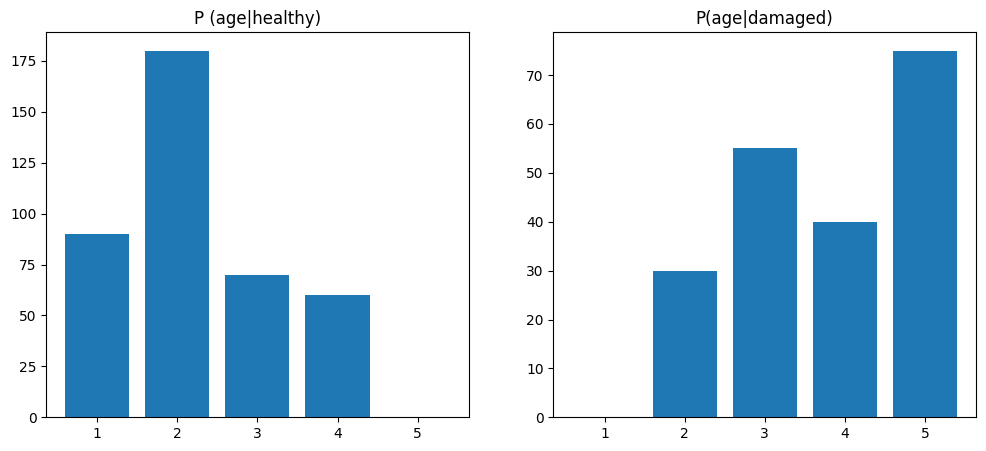

In [209]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

years = [1,2,3,4,5]
healthy_count = [90, 180, 70, 60, 0]
damaged_count = [0, 30, 55, 40, 75]

print(sum(healthy_count))

axs[0].bar(years, healthy_count)
axs[0].set_title("P (age|healthy)")

axs[1].bar(years, damaged_count)
axs[1].set_title("P(age|damaged)")

plt.show()


`Ans`: The procedure to do ML would be the following. 
1. Assume the prior is uniform given no data on age: $P(healthy) = P(damanged)$
2. For each age given, calculate the likehood $P(age | healthy), P(age | damaged)$
3. Maximize the postierior based on which likehood is higher. If $P(age | healthy) > P(age | damaged)$ then $P(healthy | age) > P(age | damaged)$.

age = 5:
- $P(age = 5 | healthy) = 0$
- $P(age = 5 | damaged) = 75 / 200 = 0.375$
- Therefore $P(age = 5 | damaged) > P(age = 5 | healthy)$ so the label is damaged.

age = 2:
- $P(age = 2 | healthy) = 180/400$
- $P(age = 2 | damaged) = 30/200$
- Therefore $P(age = 2 | healthy) > P(age = 2 | damaged)$ so the label is healthy.

age = 3:
- $P(age = 3 | healthy) = 70 / 400 = 0.175$
- $P(age = 3 | damaged) = 55 / 200 = 0.275$
- Therefore $P(age = 3 | damaged) > P(age = 3 | healthy)$ so the label is damaged.

Computing and drawing approximate curves to illustrate the posterior distributions $P(damaged|age)$ and $P(healthy|age)$.

400


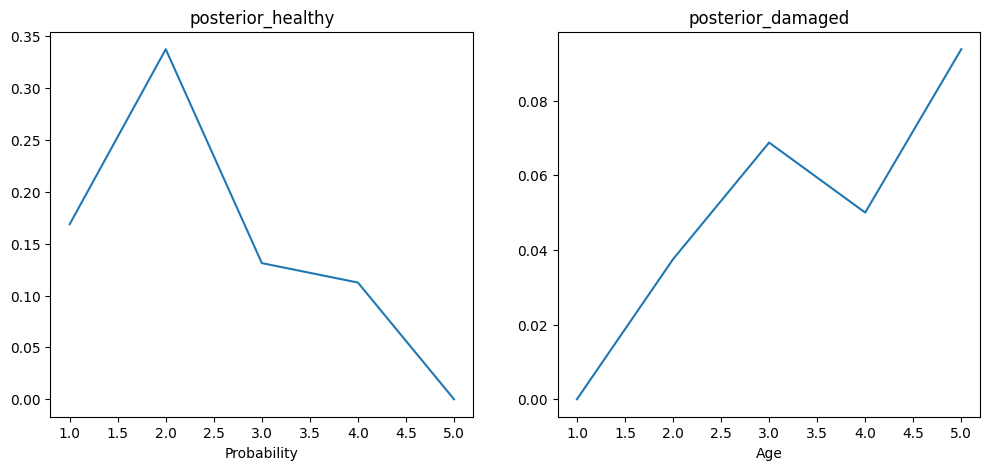

In [226]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

years = [1,2,3,4,5]
p_healthy_given_age = np.array([90, 180, 70, 60, 0])
p_damaged_given_age = np.array([0, 30, 55, 40, 75])
p_healthy_given_age = p_healthy_given_age / sum(p_healthy_given_age)
p_damaged_given_age = p_damaged_given_age / sum(p_damaged_given_age)
p_healthy = 0.75
p_damaged = 0.25

print(sum(healthy_count))

posterior_healthy = p_healthy_given_age * p_healthy
posterior_damaged = p_damaged_given_age * p_damaged


axs[0].plot(years, posterior_healthy)
axs[0].set_title("posterior_healthy")
axs[0].set_xlabel("Age")
axs[0].set_xlabel("Probability")



axs[1].plot(years, posterior_damaged)
axs[1].set_title("posterior_damaged")
axs[1].set_xlabel("Age")
axs[0].set_xlabel("Probability")



plt.show()


## Conclusions and Future Work

This project successfully simulates and visualizes multiple random walk trajectories in 2D space. The statistical analysis of the squared displacement shows that the mean squared displacement increases with time, which aligns with theoretical expectations.

### Potential Extensions:
- Implementing biased or constrained random walks
- Exploring higher-dimensional random walks
- Applying random walk concepts to real-world data (e.g., stock prices)
- Investigating self-avoiding random walks

This project provides a strong foundation for further research and applications in various domains.
